# I. Import Libraries

Let's start by reading the file to understand its structure and content. This will help in providing an overview of the data you mentioned. I'll read the file and display the first few rows to get a sense of the data.

The dataset contains information on the betting activity of individual customers for specific days. Here's an overview of the columns and their potential meanings:

- `DATE_DIM`: The date of the betting activity.
- `DAY_OF_WEEK`: The day of the week for the betting activity.
- `BET_ACCOUNT_NUM_HASH`: A unique identifier for each customer.
- `AGE`: The age of the customer.
- `AGE_BAND`: The age band or range the customer falls into.
- `GENDER`: The gender of the customer.
- `TENURE_IN_DAYS`: How long the customer has been with the service, in days.
- `RESIDENTIAL_STATE`: The state of residence of the customer.
- `FOB_RACING_TURNOVER`: Turnover from fixed odds betting on racing.
- `FOB_SPORT_TURNOVER`: Turnover from fixed odds betting on sports.
- `PARI_RACING_TURNOVER`: Turnover from pari-mutuel betting on racing.
- `PARI_SPORT_TURNOVER`: Turnover from pari-mutuel betting on sports.
- `TOTAL_TURNOVER`: The total betting turnover for the customer on that day.
- `DIVIDENDS_PAID`: The total dividends paid out to the customer on that day.
- `GROSS_MARGIN`: The gross margin from the customer's betting activity.
- `TICKETS`: The number of betting tickets or bets placed by the customer on that day.

The data seems well-structured for analysis, offering a comprehensive view of daily betting activities alongside demographic information about the customers. This dataset can be used to perform descriptive, diagnostic, predictive, and prescriptive analyses as outlined in your project guidelines, aiming to forecast future turnover based on historical wagering transactions and to optimize strategic decisions for WA TAB.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Import & Overview Dataset

## 2.1 Import Dataset

In [26]:
df_origin = pd.read_csv(r"D:\Data\TAB_Betting_Data.csv")
df = df_origin.copy()

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type int64

## 2.2 Overview the Data

In [ ]:
df.head(50)

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,NaN,1081.00,NaN,1118.00,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,NaN,NaN,NaN,40.00,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,NaN,NaN,12.00,NaN,12.00,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,NaN,NaN,1223.50,NaN,1223.50,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,NaN,NaN,17.50,NaN,17.50,0.00,3.504075,5
5,2021-01-01,Fri,850243,46.0,45-54,M,2307,WA,NaN,NaN,16.00,NaN,16.00,14.80,2.480312,11
6,2021-01-01,Fri,1213538,46.0,45-54,M,714,WA,56.0,68.0,10.00,NaN,134.00,149.00,-23.279175,12
7,2021-01-01,Fri,1225565,76.0,65+,M,10686,WA,10.0,NaN,NaN,NaN,10.00,35.00,-25.000000,1
8,2021-01-01,Fri,1501682,64.0,55-64,F,2663,WA,56.0,NaN,29.00,NaN,85.00,11.95,60.734726,46
9,2021-01-01,Fri,2012487,55.0,55-64,M,5728,WA,15.0,NaN,35.00,NaN,50.00,0.00,20.503052,7


In [ ]:
import pandas as pd

# Trích xuất 2.000.000 dòng đầu tiên bằng cách sử dụng hàm loc
first_2_million_rows = df.loc[:999999]

# Lưu 2.000.000 dòng đầu tiên vào một tập tin CSV mới
output_file = "mau.csv"  # Đường dẫn đến tập tin đầu ra
first_2_million_rows.to_csv(output_file, index=False)

print("Successfully extracted the first 2,000,000 rows to", output_file)


Successfully extracted the first 2,000,000 rows to mau.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364101 entries, 0 to 12364100
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DATE_DIM              object 
 1   DAY_OF_WEEK           object 
 2   BET_ACCOUNT_NUM_HASH  int64  
 3   AGE                   float64
 4   AGE_BAND              object 
 5   GENDER                object 
 6   TENURE_IN_DAYS        int64  
 7   RESIDENTIAL_STATE     object 
 8   FOB_RACING_TURNOVER   float64
 9   FOB_SPORT_TURNOVER    float64
 10  PARI_RACING_TURNOVER  float64
 11  PARI_SPORT_TURNOVER   float64
 12  TOTAL_TURNOVER        float64
 13  DIVIDENDS_PAID        float64
 14  GROSS_MARGIN          float64
 15  TICKETS               int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ GB


In [ ]:
df.describe()

,BET_ACCOUNT_NUM_HASH,AGE,TENURE_IN_DAYS,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
count,1.236410e+07,1.236142e+07,1.236410e+07,8.576656e+06,1.779580e+06,8.527489e+06,15678.000000,1.236410e+07,1.236410e+07,1.236410e+07,1.236410e+07
mean,2.144468e+09,5.314939e+01,3.437851e+03,1.235937e+02,1.278436e+02,1.063339e+02,37.800517,1.775206e+02,1.467335e+02,2.771342e+01,2.212268e+01
std,1.240403e+09,1.536221e+01,3.416204e+03,5.274644e+02,7.873640e+02,3.022158e+02,91.525587,6.407664e+02,6.863462e+02,2.300061e+02,6.451099e+01
min,1.315400e+04,1.800000e+01,-1.000000e+00,-1.000000e+03,-5.500000e+02,0.000000e+00,0.000000,-1.000000e+03,-2.550000e+03,-1.123050e+05,1.000000e+00
25%,1.067720e+09,4.100000e+01,9.550000e+02,1.000000e+01,1.000000e+01,1.000000e+01,4.000000,1.600000e+01,0.000000e+00,1.888508e+00,2.000000e+00
50%,2.151297e+09,5.400000e+01,2.316000e+03,3.000000e+01,2.300000e+01,3.000000e+01,11.000000,5.000000e+01,1.435000e+01,1.099573e+01,7.000000e+00
75%,3.217306e+09,6.500000e+01,4.708000e+03,9.000000e+01,7.200000e+01,9.575000e+01,32.000000,1.450000e+02,9.561000e+01,4.000000e+01,2.000000e+01
max,4.294965e+09,1.040000e+02,2.132900e+04,2.267710e+05,1.987243e+05,2.482320e+05,2368.000000,2.648910e+05,4.137750e+05,8.088635e+04,1.911400e+04


In [ ]:
# Find the range of dates in the DATE_DIM column
date_min = df['DATE_DIM'].min()
date_max = df['DATE_DIM'].max()

date_min, date_max


('2021-01-01', '2022-12-31')

- Data range in 2 years (2021,2022)

## 2.3 Checking & Dealing with Null Values

In [ ]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
null_values

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
AGE_BAND                       0
GENDER                         0
TENURE_IN_DAYS                 0
RESIDENTIAL_STATE              0
FOB_RACING_TURNOVER      3787445
FOB_SPORT_TURNOVER      10584521
PARI_RACING_TURNOVER     3836612
PARI_SPORT_TURNOVER     12348423
TOTAL_TURNOVER                 0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
TICKETS                        0
dtype: int64

**Null Values appear in some column**
- AGE: Since age is an important demographic attribute, we might not want to discard rows with missing ages without further analysis. One approach could be to fill in the missing values with the median age, assuming age is typically a well-behaved attribute with a central tendency.
- Betting Turnover Columns (FOB_RACING_TURNOVER, FOB_SPORT_TURNOVER, PARI_RACING_TURNOVER, PARI_SPORT_TURNOVER): For turnover columns, null values likely indicate that the customer did not place bets in those categories for the day. It would be reasonable to fill these null values with 0, indicating no activity.

In [ ]:
# Fill AGE null values with the median age
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Fill betting turnover columns' null values with 0
betting_turnover_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']
df[betting_turnover_columns] = df[betting_turnover_columns].fillna(0)


In [ ]:
# Re-check for null values to confirm changes
null_values_after = df.isnull().sum()
null_values_after

DATE_DIM                0
DAY_OF_WEEK             0
BET_ACCOUNT_NUM_HASH    0
AGE                     0
AGE_BAND                0
GENDER                  0
TENURE_IN_DAYS          0
RESIDENTIAL_STATE       0
FOB_RACING_TURNOVER     0
FOB_SPORT_TURNOVER      0
PARI_RACING_TURNOVER    0
PARI_SPORT_TURNOVER     0
TOTAL_TURNOVER          0
DIVIDENDS_PAID          0
GROSS_MARGIN            0
TICKETS                 0
dtype: int64

- No null left

## 2.4 Checking & Dealing with duplicated rows

In [ ]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

- No duplicated rows founf in this dataset. Luckily!

## 2.5 Checking Unique Per Columns

In [ ]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in 'DATE_DIM':
['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '2021-0

In [ ]:
# Mapping for converting days of the week from names to numbers as specified
day_of_week_mapping = {
    'Fri': 6, 'Sat': 7, 'Sun': 8,
    'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5
}

# Apply the mapping to convert 'DAY_OF_WEEK' column
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_of_week_mapping)

# Verify the conversion by checking the unique values in 'DAY_OF_WEEK' column
df.head()


,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,6,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288
1,2021-01-01,6,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1
2,2021-01-01,6,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5
3,2021-01-01,6,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40
4,2021-01-01,6,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5


## 2.6 Dealing with Negative

In [ ]:
# List of specified columns to check for negative values
specified_columns = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]

# Counting the number of negative values in each specified column in the cleaned dataset
negative_value_counts_cleaned = {column: (df[column] < 0).sum() for column in specified_columns}

negative_value_counts_cleaned


{'FOB_RACING_TURNOVER': 168,
 'FOB_SPORT_TURNOVER': 107,
 'PARI_RACING_TURNOVER': 0,
 'PARI_SPORT_TURNOVER': 0,
 'TOTAL_TURNOVER': 199,
 'DIVIDENDS_PAID': 247,
 'GROSS_MARGIN': 1929139,
 'TICKETS': 0}

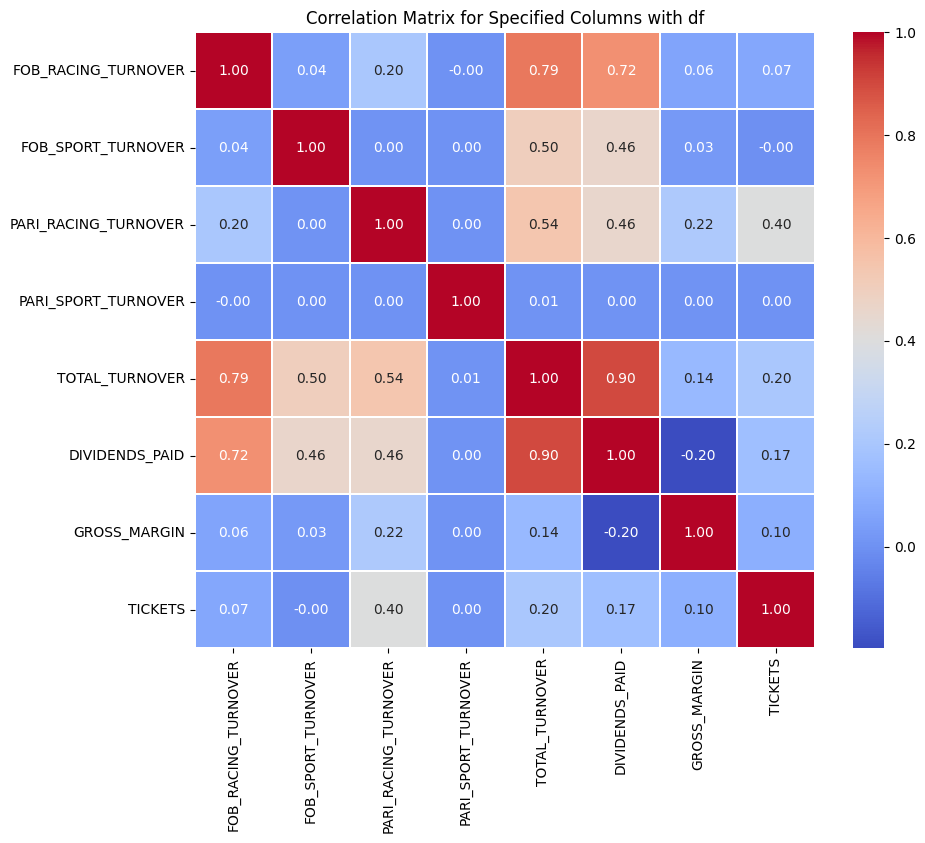

In [ ]:


# Calculate the correlation among specified numerical features for records with negative GROSS_MARGIN
specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
df_corr = df[specified_columns_for_correlation].corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with df")
plt.show()


Trong biểu đồ ma trận tương quan mới này, chúng ta có thể thấy một số mối liên hệ khác biệt so với ma trận trước đó:

1. **`TOTAL_TURNOVER` và `DIVIDENDS_PAID`**: Sự tương quan mạnh (0.90) giữa tổng doanh thu và số tiền thưởng trả ra vẫn đứng vững, khẳng định rằng khi doanh thu từ cược tăng lên, số tiền thưởng trả cho người chơi cũng tăng theo.

2. **`FOB_RACING_TURNOVER` và `TOTAL_TURNOVER`**: Có một mối tương quan khá mạnh (0.79), cho thấy rằng doanh thu từ cược đua ngựa cố định là một phần quan trọng của tổng doanh thu cược.

3. **`GROSS_MARGIN`**: Không có mối liên hệ mạnh nào giữa `GROSS_MARGIN` và các cột doanh thu cược cụ thể (tất cả đều dưới 0.25), cho thấy rằng các yếu tố khác ngoài doanh thu cược có thể đang ảnh hưởng đến lợi nhuận ròng. Điều này có thể bao gồm cấu trúc chi phí, quản lý rủi ro, hoặc các yếu tố thị trường khác.

4. **`TICKETS`**: Không có mối liên hệ đáng kể giữa số lượng vé (`TICKETS`) và `GROSS_MARGIN` (0.10), gợi ý rằng việc tăng số lượng giao dịch không trực tiếp dẫn đến việc cải thiện lợi nhuận ròng.

5. **Mối liên hệ giữa `FOB_RACING_TURNOVER` và `DIVIDENDS_PAID`**: Mối tương quan dương (0.72) cho thấy rằng số tiền thưởng trả ra có thể bị ảnh hưởng đáng kể bởi doanh thu từ cược đua ngựa cố định.

Dựa trên những phát hiện này, WA TAB có thể cần xem xét việc điều chỉnh chiến lược định giá và quản lý rủi ro của mình, đặc biệt là trong các loại hình cược có tương quan cao với số tiền thưởng trả ra. Điều quan trọng là cần phải cân nhắc đến cả tỷ lệ cược và kỳ vọng của khách hàng để đảm bảo rằng lợi nhuận được tối ưu hóa.

In [ ]:
# Extracting records where any of the specified columns have negative values
columns_with_potential_negatives = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER',
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN'
]

# Create a condition for any of the specified columns to have negative values
condition = (df[columns_with_potential_negatives] < 0).any(axis=1)

# Filter the records based on the condition
negative_value_records = df[condition]

negative_value_records


,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
6,2021-01-01,6,1213538,46.0,45-54,M,714,WA,56.0,68.0,10.0,0.0,134.0,149.00,-23.279175,12
7,2021-01-01,6,1225565,76.0,65+,M,10686,WA,10.0,0.0,0.0,0.0,10.0,35.00,-25.000000,1
15,2021-01-01,6,3099282,81.0,65+,M,5182,WA,35.0,0.0,119.4,0.0,154.4,279.31,-98.807931,18
26,2021-01-01,6,5088323,61.0,55-64,U,894,WA,55.0,0.0,0.0,0.0,55.0,84.00,-29.000000,2
32,2021-01-01,6,5932568,30.0,25-34,M,2553,WA,50.0,0.0,0.0,0.0,50.0,60.00,-10.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364078,2022-12-31,7,4290850633,67.0,65+,U,1400,OTH,14.0,0.0,0.0,0.0,14.0,20.00,-6.000000,7
12364083,2022-12-31,7,4291637614,39.0,35-44,M,6107,WA,605.0,0.0,117.5,0.0,722.5,780.10,-35.704346,77
12364090,2022-12-31,7,4292843937,30.0,25-34,M,1667,WA,106.0,0.0,0.0,0.0,106.0,132.00,-26.000000,9
12364094,2022-12-31,7,4293602952,46.0,45-54,M,3816,WA,342.0,0.0,122.5,0.0,464.5,486.15,-58.899433,34


- Nhận xét chung của mấy cái giá trị âm này là giá trị trung bình không lớn, độ lệch của các giá trị cũng cao nữa. Chúng ta có nhiều cách để giải quyết
    - Loại bỏ: Loại bỏ hoàn toàn thì ít nhiều sẽ ảnh hưởng ít đến kết quả cuối. Và nó cũng chỉ chiếm số ít cọ thể 1xx trong 12tr dòng. 
    - Thay đổi: 
        - Nếu bạn quyết định xử lý các giá trị âm trong cột `FOB_SPORT_TURNOVER` thay vì loại bỏ chúng hoàn toàn, có một số phương pháp bạn có thể xem xét:

        ### 1. Thiết Lập Lại Giá Trị Bằng 0
        Giả định rằng các giá trị âm không phản ánh chính xác hoạt động cược và có thể được xem là không có hoạt động, bạn có thể thiết lập lại chúng thành 0.

        ```python
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = 0
        ```

        ### 2. Chuyển Đổi Sang Giá Trị Tuyệt Đối
        Nếu giả định rằng giá trị tuyệt đối của các số liệu âm có ý nghĩa trong một bối cảnh nào đó (ví dụ, biểu thị giá trị hoàn tiền), bạn có thể chuyển đổi chúng sang giá trị tuyệt đối.

        ```python
        data['FOB_SPORT_TURNOVER'] = data['FOB_SPORT_TURNOVER'].abs()
        ```

        ### 3. Sử Dụng Giá Trị Trung Bình hoặc Trung Vị
        Nếu giá trị âm được coi là ngoại lệ, bạn có thể thay thế chúng bằng giá trị trung bình hoặc trung vị của cột. Điều này giúp giữ dữ liệu ổn định mà không bị ảnh hưởng bởi ngoại lệ.

        ```python
        mean_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].mean()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = mean_value
        ```

        hoặc

        ```python
        median_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].median()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = median_value
        ```
---------------------------
- Dựa vào cá nhân, cảm nhận và kinh nghiệm thì mình sẽ loại bỏ hoàn toàn, và coi đây là các giá trị ngoại lai.

In [ ]:
shape_before = df.shape

# Removing rows with negative values in FOB_SPORT_TURNOVER
condition = (
    (df['FOB_SPORT_TURNOVER'] >= 0) &
    (df['FOB_RACING_TURNOVER'] >= 0) &
    (df['PARI_RACING_TURNOVER'] >= 0) &
    (df['PARI_SPORT_TURNOVER'] >= 0) &
    (df['TOTAL_TURNOVER'] >= 0) &
    (df['DIVIDENDS_PAID'] >= 0)
)

df = df[condition]
# Check the shape of the data before and after removal to confirm the change
shape_after = df.shape

shape_before, shape_after



((12364101, 16), (12363655, 16))

In [ ]:
rows_removed = shape_before[0]-shape_after[0]
rows_removed

446

## 2.7 Dealing with Time Features

In [ ]:
# Convert DATE_DIM to datetime format
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])
# Tạo cột 'Week' và 'Month'
df['Week'] = df['DATE_DIM'].dt.isocalendar().week
df['Month'] = df['DATE_DIM'].dt.month
df['Year'] = df['DATE_DIM'].dt.year
# Convert DATE_DIM to datetime format
df['DATE_DIM'] = df['DATE_DIM'].dt.date
# Check the conversion by displaying the dtype of DATE_DIM
df['DATE_DIM'].dtype

df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS,Week,Month,Year
0,2021-01-01,6,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288,53,1,2021
1,2021-01-01,6,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1,53,1,2021
2,2021-01-01,6,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5,53,1,2021
3,2021-01-01,6,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40,53,1,2021
4,2021-01-01,6,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5,53,1,2021


# IV. DATA STANDARDIZING & NORMALIZATION

In [ ]:
df1 = df.copy()

MemoryError: Unable to allocate 377. MiB for an array with shape (4, 12363655) and data type object

In [ ]:

# Các cột cần áp dụng Log Transformation từ df1
columns_to_transform = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER',
                        'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'TICKETS']

# Áp dụng Log Transformation cho từng cột
for column in columns_to_transform:
    df1[column] = np.log(df1[column])

# In ra DataFrame mới sau khi áp dụng Log Transformation
print(df1)


# V. TRAIN - VALID - TEST SPLIT

CHia dữ liệu ra 9:0,5:0,5

# VI. FORECASTING

DÙNG DEEP LEARNING ĐỂ LÀM VÀ DỰ ĐOÁN

# VII. EVALUATION